### Wholesale Customer

**Context**: The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories.

**Task**: Goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with.

Implementation:
- Performing EDA and any data cleaning if necessary.
- Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to why it was selected?
- Find optimal number of features using RFECV and show the plot between Number of features selected vs Cross validation score (use channel as target variable)
- Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the optimum number of clusters
- Implement PCA with number of original features to answer how much variance is explained by first 2 components and by first 4 components and visualize the clusters in the data
- Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_excel("whole_customer_data.xlsx")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis

In [3]:
#checking for missing values
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Feature Scaling

In [5]:
#scaling data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaled_min = MinMaxScaler().fit_transform(data)
scaled_min[:5]

array([[1.        , 1.        , 0.11294004, 0.13072723, 0.08146416,
        0.0031063 , 0.0654272 , 0.02784731],
       [1.        , 1.        , 0.06289903, 0.13282409, 0.10309667,
        0.02854842, 0.08058985, 0.03698373],
       [1.        , 1.        , 0.05662161, 0.11918086, 0.08278992,
        0.03911643, 0.08605232, 0.16355861],
       [0.        , 1.        , 0.11825445, 0.01553586, 0.04546385,
        0.10484189, 0.01234568, 0.03723404],
       [1.        , 1.        , 0.20162642, 0.07291369, 0.07755155,
        0.063934  , 0.04345483, 0.10809345]])

In [6]:
pd.DataFrame(scaled_min).describe()

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


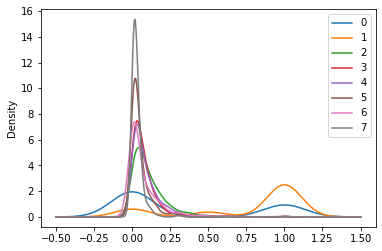

In [8]:
#KDE Plot for MinMaxScaler
pd.DataFrame(scaled_min).plot(kind='kde');

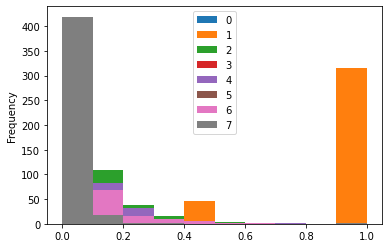

In [9]:
#Hist Plot for MinMaxScaler
pd.DataFrame(scaled_min).plot(kind='hist');

In [10]:
from sklearn.preprocessing import StandardScaler
scaled_s = StandardScaler().fit_transform(data)
scaled_s[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [11]:
pd.DataFrame(scaled_s).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


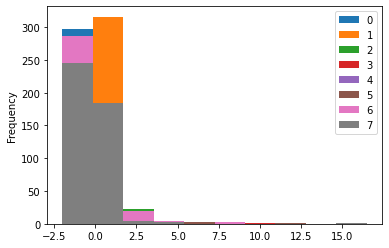

In [12]:
#Hist Plot for MinMaxScaler
pd.DataFrame(scaled_s).plot(kind='hist');

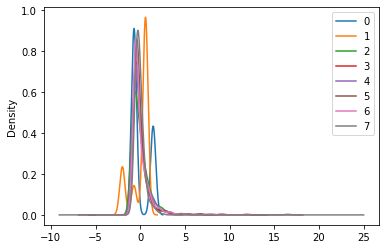

In [13]:
#KDE Plot for StandardScaler
pd.DataFrame(scaled_s).plot(kind='kde');

We'll go with the Standard Scalar going forward, from the KDE and Histogram Plots we can see that StandardScaler did a better job in scaling the data with the distribution of the columns around the same range. Minmaxscalar's distribution of scaled data had a wider range. 

In [14]:
#separating features and target column
X = data.drop('Channel', axis=1)
y = data['Channel']

In [15]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [16]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

We can see that our target variable contain values of 1 and 2. We need to convert it into 0 and 1 for our classification model.

In [17]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [18]:
#Now in 0's and 1's
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

## RFECV to find optimal number of features

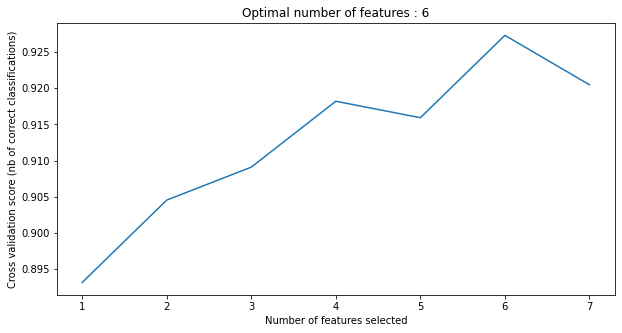

In [20]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

Our optimal number of features is 6, as we can see in the above plot

## KMeans Clustering

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [20]:
# Loop through clusters and fit the model to the train set
clusters=range(2,15)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    clusassign=model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1),data.shape[0]))

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

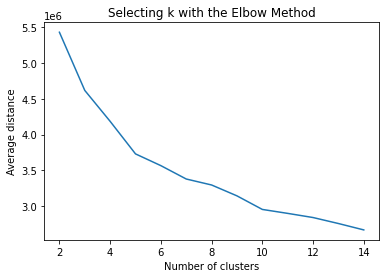

In [21]:
# display the data
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

From the Elbow Method above, we can notice that we have our biggest drop when k=5. So our optinum number of clusters is 5.

In [36]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(data)

predictions = kmeans.predict(data)

#calculationg counts of cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

#creating dataframe to visualize counts
countscl = pd.DataFrame(counts, columns = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])

countscl

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,224,81,24,7,104


In [30]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 0, 2, 3, 0, 1, 0, 0, 1, 1, 0, 0, 2, 3, 0, 0, 2, 2,
       1, 2, 2, 4, 1, 2, 1, 1, 3, 2, 0, 1, 2, 2, 1, 1, 1, 4, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 4, 4, 3,
       1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 3, 0, 0, 1, 2, 1, 2,
       1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 0, 0, 1, 3, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 3, 3, 1, 1, 0, 1,
       2, 2, 2, 0, 2, 0, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 3, 0, 3, 3,
       1, 0, 0, 3, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0,

## Principal Component Analysis

In [22]:
# Create a PCA instance: pca
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(scaled_s)

([<matplotlib.axis.XTick at 0x21ae71102b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

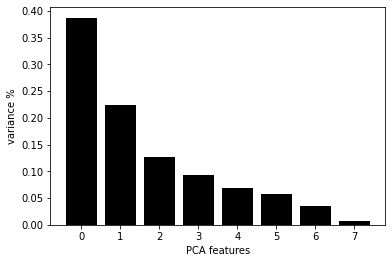

In [23]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [24]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354, 0.03514076, 0.00784877])

As we can see above, The first two Components had the most variance with 0.39 and 0.22 respectively, the 3rd and 4th components also had 0.12 and 0.06 explained variance respectively. So the first 4 components explain 79% variance of the dataset.

<Figure size 432x288 with 0 Axes>

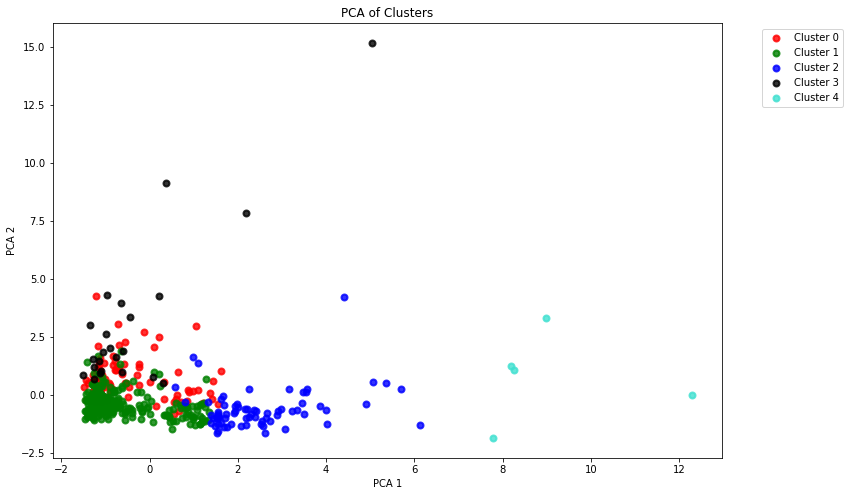

In [35]:
#create PCA plot
X_pca = scaled_s
y_num = predictions

target_names = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

X_r = pca.fit(X_pca).transform(X_pca)

#plotting the data
plt.figure()
plt.figure(figsize=(12, 8))
colors = ["red", "green", "blue", "black", "turquoise"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Implementing XGBoost Classifier with 5 Fold CV

In [62]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [57]:
#Splitting the dataset to train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [60]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [58]:
pd.DataFrame(X_train).to_csv("train_features.csv", index=False)
pd.DataFrame(X_test).to_csv("test_features.csv", index=False)

pd.DataFrame(y_train).to_csv("train_labels.csv", index=False)
pd.DataFrame(y_test).to_csv("test_labels.csv", index=False)

In [59]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')
te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [67]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

xgbc = xgb.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)

cv = GridSearchCV(estimator=xgbc, param_grid=parameters, scoring = 'roc_auc', n_jobs = 10, cv = 5, verbose=True)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[15:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
BEST PARAMS: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 140}

0.946 (+/-0.047) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}
0.947 (+/-0.046) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.943 (+/-0.047) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}
0.938 (+/-0.05) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180}
0.944 (+/-0.046) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
0.943 (+/-0.048) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.939 (+/-0.049) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimat

In [68]:
import joblib
joblib.dump(cv.best_estimator_, '../../../XGB_model.pkl')

['../../../XGB_model.pkl']

In [69]:
models = {}

for mdl in ['XGB']:
    models[mdl] = joblib.load('../../../{}_model.pkl'.format(mdl))

In [70]:
models

{'XGB': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.05, max_delta_step=0, max_depth=2,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
               random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
               seed=42, subsample=1, tree_method='exact', validate_parameters=1,
               verbosity=None)}

In [71]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [72]:
evaluate_model('XGB', models['XGB'], te_features, te_labels)


XGB -- Accuracy: 0.902 / Precision: 0.897 / Recall: 0.884 / Latency: 5.0ms
